In [76]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score , KFold , StratifiedKFold, GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score ,f1_score, recall_score,make_scorer , classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings

In [2]:

warnings.filterwarnings("ignore")

In [3]:
# Load diabetes dataset into dataframe
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check null values present in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA 

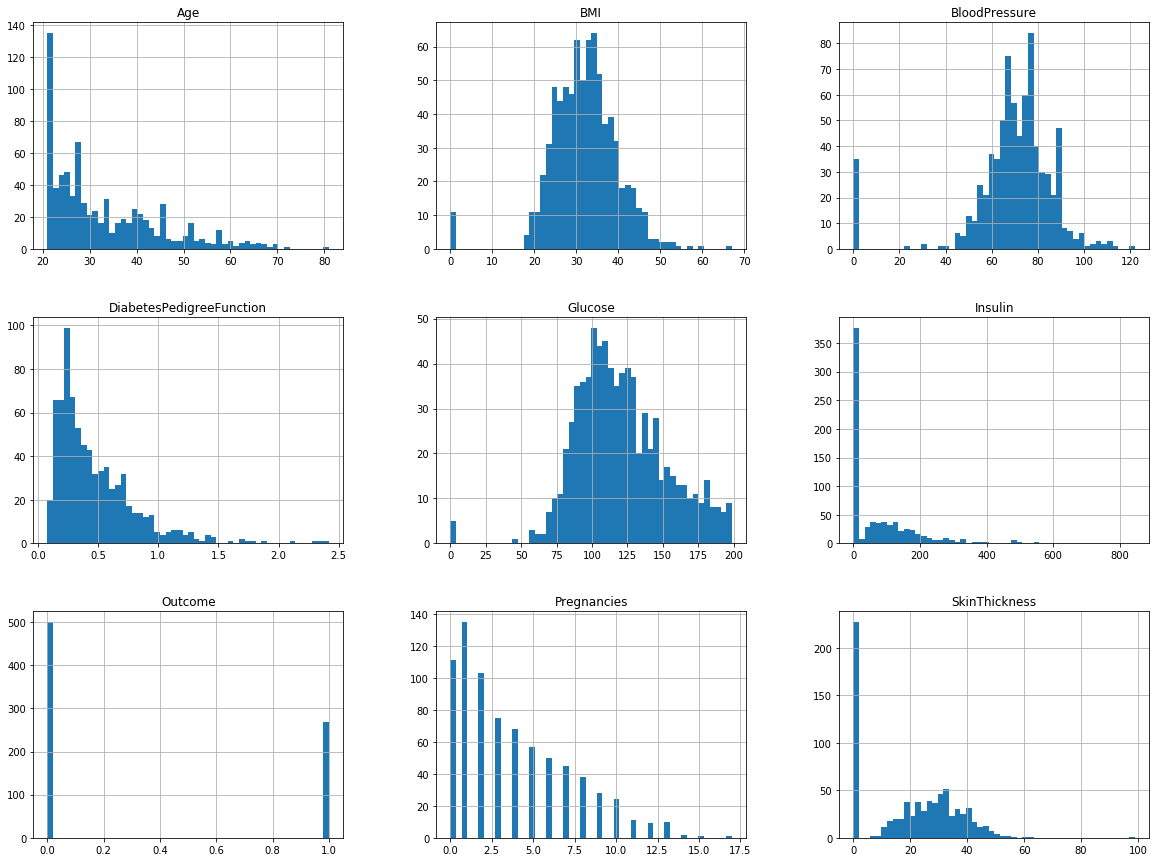

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

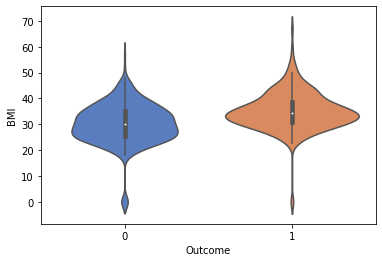

In [8]:
#Classifying the BMI based on class
ax = sns.violinplot(x='Outcome', y='BMI', data=df, palette='muted', split=True)

In [9]:
df[df['BMI']==0]['BMI'].count()

#There are 11 records with BMI as 0 , so we will impute this with the median.

11

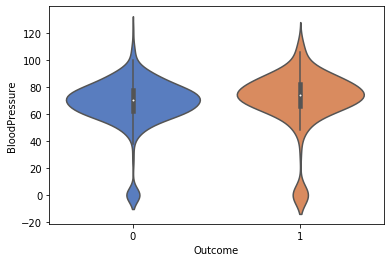

In [11]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=df, palette='muted', split=True)

In [12]:
df[df['BloodPressure']==0]['BloodPressure'].count()

# There are lot of records which has 0 value for Blood Pressure. We will have to impute those values to median.

35

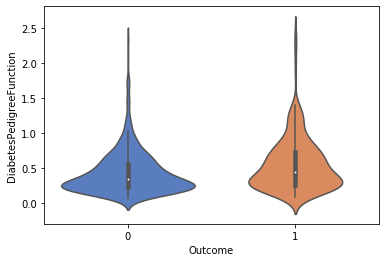

In [14]:
#Classifying the DiabetesPedigreeFunction based on class
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='muted', split=True)

In [15]:
df[df['DiabetesPedigreeFunction']==0]['DiabetesPedigreeFunction'].count()

0

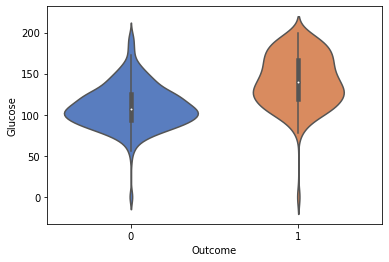

In [16]:
#Classifying the Glucose based on class
ax = sns.violinplot(x='Outcome', y='Glucose', data=df, palette='muted', split=True)

In [17]:
df[df['Glucose']==0]['Glucose'].count()

# There are 5  records for which Glucose is 0. We will have to impute those values to median.

5

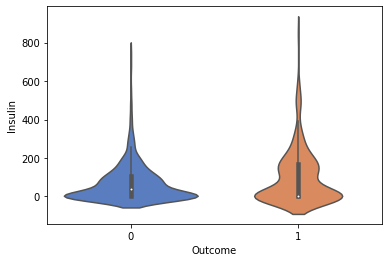

In [19]:
#Classifying the Insulin based on class
ax = sns.violinplot(x='Outcome', y='Insulin', data=df, palette='muted', split=True)

In [20]:
df[df['Insulin']==0]['Insulin'].count()

374

In [21]:
df['Insulin'].value_counts(1)

#we have close to 48% of data as 0 for Insulin. Hece, we will also impute this with Median.

0      0.486979
105    0.014323
140    0.011719
130    0.011719
120    0.010417
100    0.009115
94     0.009115
180    0.009115
110    0.007812
115    0.007812
135    0.007812
66     0.006510
49     0.006510
56     0.006510
76     0.006510
210    0.006510
90     0.005208
88     0.005208
125    0.005208
71     0.005208
200    0.005208
155    0.005208
64     0.005208
160    0.005208
168    0.005208
165    0.005208
54     0.005208
190    0.005208
36     0.003906
182    0.003906
         ...   
191    0.001302
166    0.001302
188    0.001302
184    0.001302
171    0.001302
119    0.001302
255    0.001302
318    0.001302
91     0.001302
310    0.001302
81     0.001302
304    0.001302
300    0.001302
183    0.001302
86     0.001302
291    0.001302
89     0.001302
284    0.001302
280    0.001302
258    0.001302
278    0.001302
277    0.001302
275    0.001302
274    0.001302
272    0.001302
271    0.001302
270    0.001302
108    0.001302
112    0.001302
846    0.001302
Name: Insulin, Length: 1

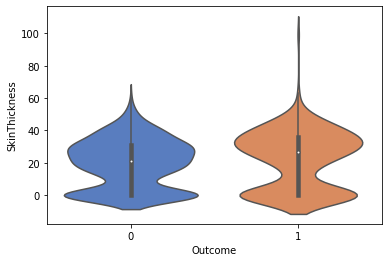

In [23]:
#Classifying the Skin Thickness based on class
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=df, palette='muted', split=True)

In [24]:
df[df['SkinThickness']==0]['SkinThickness'].count()

#we will impute values with 0 for Skin Thickness with median.

227

## Imputation

In [26]:
median_BMI = df['BMI'].median()
df['BMI']= df['BMI'].replace(to_replace=0,value=median_BMI)

In [27]:
median_BloodPressure = df['BloodPressure'].median()
df['BloodPressure']= df['BloodPressure'].replace(to_replace=0,value=median_BloodPressure)

In [28]:
median_Glucose = df['Glucose'].median()
df['Glucose']= df['Glucose'].replace(to_replace=0,value=median_Glucose)

In [29]:
median_Insulin = df['Insulin'].median()
df['Insulin']= df['Insulin'].replace(to_replace=0,value=median_Insulin)

In [30]:
median_SkinThickness = df['SkinThickness'].median()
df['SkinThickness']= df['SkinThickness'].replace(to_replace=0,value=median_SkinThickness)

In [31]:
print(df[df['BMI']==0]['BMI'].count())
print(df[df['BloodPressure']==0]['BloodPressure'].count())
print(df[df['Glucose']==0]['Glucose'].count())
print(df[df['Insulin']==0]['Insulin'].count())
print(df[df['SkinThickness']==0]['SkinThickness'].count())

0
0
0
0
0


In [32]:
#Check Multi-Collinearity 
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


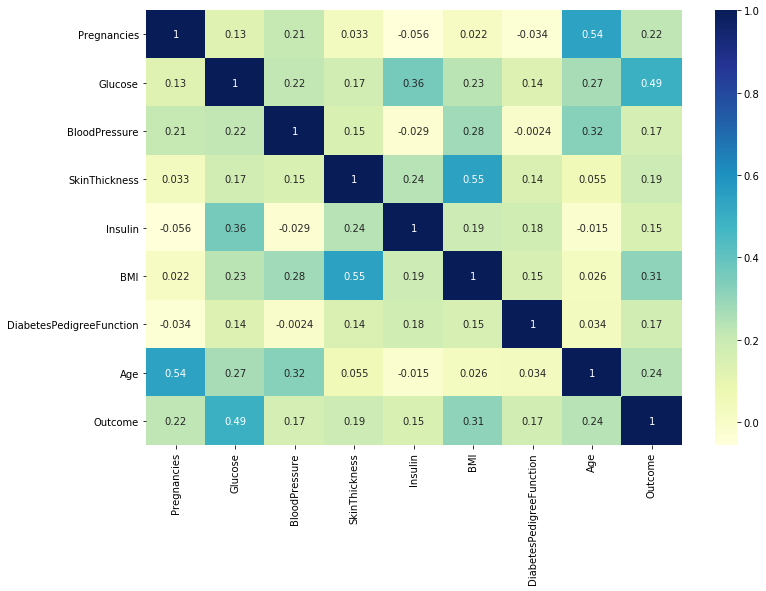

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True,cmap="YlGnBu")
plt.show()

#There is no significant Collinearity observed. We can proceed.

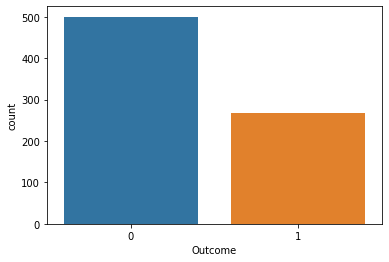

In [35]:
#Check distribution of dependent variable "Outcome"

sns.countplot(x='Outcome',data=df)
#data seems to be imbalanced. 

In [37]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#Splitting the data into dependent and independent variables
y = df.Outcome
X = df.drop('Outcome', axis = 1)
columns = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)
data_x = pd.DataFrame(X, columns = columns)

data_x.head()

In [39]:
#Splitting the data into training and test
x_train, x_test, y_train, y_test = train_test_split(data_x, y, test_size = 0.15, random_state = 45)

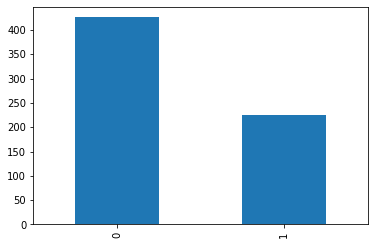

In [40]:
y_train.value_counts().plot(kind='bar')

In [41]:
#Smote for train data
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

array([426, 426], dtype=int64)

In [42]:
#Smote for entire data for using along with cross-validation
smt = SMOTE()
X, y = smt.fit_sample(X, y)
np.bincount(y)

array([500, 500], dtype=int64)

In [64]:
df_sampled = pd.DataFrame(X, columns = columns)

df_sampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


## Model Building 

In [43]:
# Test(BaseLine) Model
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.76
0.7478260869565219
0.7442424242424243
0.7593307593307593


In [44]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [45]:
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.724138
1  SVC  0.724138
2   LR  0.732759
3   DT  0.741379
4  GNB  0.724138
5   RF  0.767241
6   GB  0.724138


In [49]:
#Applying startified K fold
names = []
scores = []
for name, model in models:
    
    strat_k_fold  = StratifiedKFold(n_splits=10)
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)



  Name  Score
0  KNN  0.788
1  SVC  0.796
2   LR  0.752
3   DT  0.783
4  GNB  0.730
5   RF  0.831
6   GB  0.793


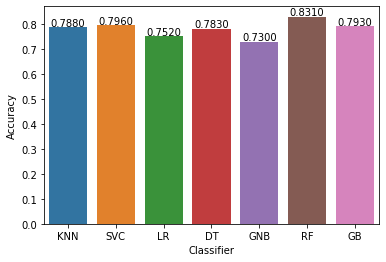

In [50]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

This shows RandomForestClassifier has got the best accuracy compared(~83%) to others.

## Feature Importance 

In [101]:
from sklearn.feature_selection import RFECV
rf_model = RandomForestClassifier()
rfecv = RFECV(estimator=rf_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

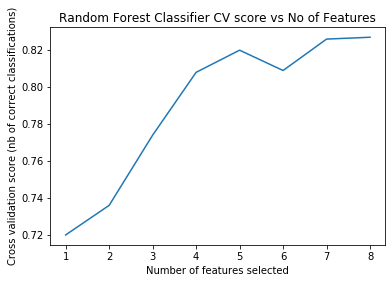

In [102]:
plt.figure()
plt.title('Random Forest Classifier CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [103]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [104]:
# Calculate accuracy scores 
X_new = df_sampled[new_features]
initial_score = cross_val_score(rf_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(rf_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.8320000000000001 
Accuracy after Feature Selection : 0.826 


## Hyper Parameter Tuning 

RandomizedSearchCV

In [105]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [106]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_new, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [107]:
print(rf_randomcv.best_params_)
print(rf_randomcv.best_estimator_)
print(rf_randomcv.best_score_)

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'criterion': 'entropy'}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8240575905246564


In [108]:
best_random_grid=rf_randomcv.best_estimator_

In [109]:
#rf_new = RandomForestClassifier(C=2, multi_class='ovr', penalty='l1', solver='liblinear')
initial_score = cross_val_score(best_random_grid, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after RandomizedSearchCV : {} ".format(initial_score))

Accuracy after RandomizedSearchCV : 0.8320000000000001 


GridSearchCV

In [110]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [111]:
rf_grid=RandomForestClassifier()
rf_grid_search=GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
### fit the randomized model
rf_grid_search.fit(X_new, y)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [112]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_estimator_)
print(rf_grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 120, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1400}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8260595925266584


In [113]:
best_grid=rf_grid_search.best_estimator_

best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=120, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
grid_score = cross_val_score(best_grid, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(grid_score))

Final accuracy : 0.825 


In [115]:
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [116]:
grid_final_score = cross_val_score(best_grid, X_new, y, cv=strat_k_fold, scoring=make_scorer(classification_report_with_accuracy_score)).mean()
print("Final accuracy : {} ".format(grid_final_score))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.75      0.84      0.79        50

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        50
           1       0.83      0.78      0.80        50

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        50
           1       0.73      0.66      0.69        50

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

              preci

After feature importance and hyper-parameter tuning , there was not much difference in the accuracy , infact it got reduced to .5. But we can use RandomForestClassifier as our final model.